In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.ensemble import IsolationForest

rs = np.random.RandomState(42)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('machine_data.csv')
df.head(10)

,Date,Values
0,3/1/2014,45.868
1,3/2/2014,47.606
2,3/3/2014,42.580
3,3/4/2014,46.030
4,3/5/2014,44.992
5,3/6/2014,45.238
6,3/7/2014,45.752
7,3/8/2014,46.476
8,3/9/2014,42.752
9,3/10/2014,46.156


In [3]:
df.dtypes

Date       object
Values    float64
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date')
df.dtypes

Date      datetime64[ns]
Values           float64
dtype: object

,Values
count,1768.000000
mean,45.123334
std,1.879119
min,38.498000
25%,43.882500
50%,45.000000
75%,46.341500
max,51.972000


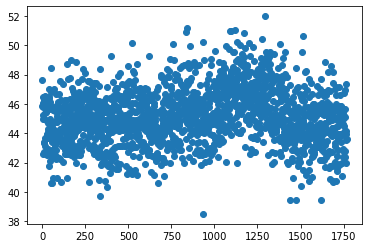

In [5]:
plt.scatter(x = df.index, y = df['Values'])
df.describe()

In [6]:
# Create the model for the data and fit the data
df['Date'] = df['Date'].map(dt.datetime.toordinal)
model = IsolationForest()
model.fit(df)
df['Outliers'] = pd.Series(model.predict(df)).apply(lambda x: 'yes' if (x == -1) else 'no') # outliers are yes

df['Outliers'].value_counts()
#df.head(10)

no     1207
yes     561
Name: Outliers, dtype: int64

In [7]:
# create outliers to test model
upperbound = df.quantile(0.95)
lowerbound = df.quantile(0.5)
high_outliers = pd.DataFrame(np.random.randint(upperbound, upperbound * 1.5, size = (100, 1)))
low_outliers = pd.DataFrame(np.random.randint(lowerbound * 0.5, lowerbound, size = (100, 1)))

In [12]:
series = pd.Series(model.fit_predict(high_outliers)).apply(lambda x: 'yes' if (x == -1) else 'no') # outliers are yes
series.value_counts()

yes    75
no     25
dtype: int64

In [13]:
series = pd.Series(model.fit_predict(low_outliers)).apply(lambda x: 'yes' if (x == -1) else 'no') # outliers are yes
series.value_counts()

yes    62
no     38
dtype: int64